In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pandas as pd
#Read the dataset/s
df = pd.read_csv('/content/drive/MyDrive/CapstoneProject/surveylungcancer.csv')

In [ ]:
# Import necessary libraries
from sklearn.exceptions import DataDimensionalityWarning  # Import a warning class
# Encode object columns to integers
from sklearn import preprocessing  # Import preprocessing module from scikit-learn
from sklearn.preprocessing import OrdinalEncoder  # Import OrdinalEncoder from preprocessing

# Loop through each column in the DataFrame
for col in df:
    # Check if the column's data type is 'object' (categorical)
    if df[col].dtype == 'object':
        # Use OrdinalEncoder to convert categorical values to integers
        df[col] = OrdinalEncoder().fit_transform(df[col].values.reshape(-1, 1))

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1.0
1,1.0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1.0
2,0.0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0.0
3,1.0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0.0
4,0.0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.0,56,1,1,1,2,2,2,1,1,2,2,2,2,1,1.0
305,1.0,70,2,1,1,1,1,2,2,2,2,2,2,1,2,1.0
306,1.0,58,2,1,1,1,1,1,2,2,2,2,1,1,2,1.0
307,1.0,67,2,1,2,1,1,2,2,1,2,2,2,1,2,1.0


In [ ]:
# Store the 'LUNG_CANCER' column in 'class_label' variable
class_label = df['LUNG_CANCER']

# Remove the 'LUNG_CANCER' column from the DataFrame
df = df.drop(['LUNG_CANCER'], axis=1)

# Normalize the DataFrame using min-max scaling
df = (df - df.min()) / (df.max() - df.min())

# Re-add the 'LUNG_CANCER' column to the DataFrame
df['LUNG_CANCER'] = class_label

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1.0,0.727273,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
1,1.0,0.803030,1.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0
2,0.0,0.575758,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1.0,0.636364,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
4,0.0,0.636364,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0.0,0.530303,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0
305,1.0,0.742424,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0
306,1.0,0.560606,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0
307,1.0,0.696970,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [ ]:
# Create a label encoder
le = preprocessing.LabelEncoder()

# Encode the new variables
GENDER = le.fit_transform(list(df["GENDER"]))
AGE = le.fit_transform(list(df["AGE"]))
SMOKING = le.fit_transform(list(df["SMOKING"]))
YELLOW_FINGERS = le.fit_transform(list(df["YELLOW_FINGERS"]))
ANXIETY = le.fit_transform(list(df["ANXIETY"]))
PEER_PRESSURE = le.fit_transform(list(df["PEER_PRESSURE"]))
CHRONIC_DISEASE = le.fit_transform(list(df["CHRONIC DISEASE"]))
FATIGUE = le.fit_transform(list(df["FATIGUE "]))  # Note the space in column name
ALLERGY = le.fit_transform(list(df["ALLERGY "]))  # Note the space in column name
WHEEZING = le.fit_transform(list(df["WHEEZING"]))
ALCOHOL_CONSUMING = le.fit_transform(list(df["ALCOHOL CONSUMING"]))
COUGHING = le.fit_transform(list(df["COUGHING"]))
SHORTNESS_OF_BREATH = le.fit_transform(list(df["SHORTNESS OF BREATH"]))
SWALLOWING_DIFFICULTY = le.fit_transform(list(df["SWALLOWING DIFFICULTY"]))
CHEST_PAIN = le.fit_transform(list(df["CHEST PAIN"]))
LUNG_CANCER = le.fit_transform(list(df["LUNG_CANCER"]))  # Note the column name change

In [ ]:
# Create a list of tuples, where each tuple contains values from different variables
x = list(zip(GENDER, AGE, SMOKING, YELLOW_FINGERS, ANXIETY, PEER_PRESSURE, CHRONIC_DISEASE, FATIGUE, ALLERGY,
             WHEEZING, ALCOHOL_CONSUMING, COUGHING, SHORTNESS_OF_BREATH, SWALLOWING_DIFFICULTY, CHEST_PAIN, LUNG_CANCER))

# Create a list for the target variable
y = list(LUNG_CANCER)

# Define options and evaluation metric for model testing
num_folds = 5  # Number of cross-validation folds
seed = 7  # Random seed for reproducibility
scoring = 'accuracy'  # Metric to evaluate model performance (accuracy in this case)

In [ ]:
# Model Test/Train
# Splitting what we are trying to predict into 4 different arrays -
# X train is a section of the x array(attributes) and similarly for Y(features)
# The test data will test the accuracy of the model created
import sklearn.model_selection
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size = 0.20, random_state=seed)
# 0.2 means 80% training 20% testing
#splitting 20% of our data into test samples. If we train the model with higher data it already has seen that information and knows

In [ ]:
# Size of train and test subsets after splitting
import numpy as np
np.shape(x_train), np.shape(x_test)

((247, 16), (62, 16))

In [ ]:
# Predictive analytics model development by comparing different Scikit-learn classification algorithms
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier

models = []
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))
# evaluate each model in turn
results = []
names = []
print("Performance on Training set")
for name, model in models:
  kfold = KFold(n_splits=num_folds,shuffle=True,random_state=seed)
  cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  msg += '\n'
  print(msg)

Performance on Training set
NB: 1.000000 (0.000000)

SVM: 0.898939 (0.025057)

GBM: 1.000000 (0.000000)

RF: 1.000000 (0.000000)



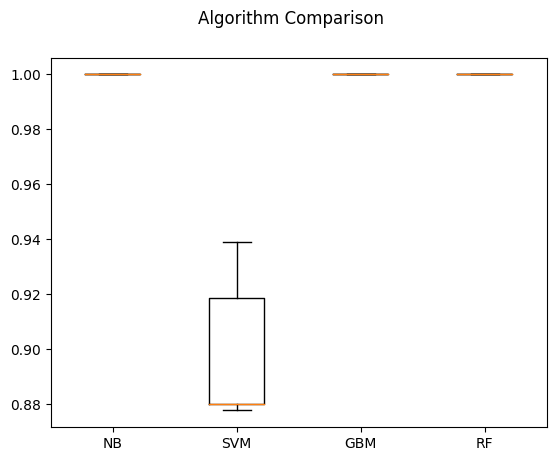

In [ ]:
# Import the necessary library for data visualization
import matplotlib.pyplot as plt
# Create a new figure for the plot
fig = plt.figure()
# Set a title for the figure
fig.suptitle('Algorithm Comparison')
# Add a subplot (axes) to the figure
ax = fig.add_subplot(111)
# Generate a boxplot to compare algorithm performance
plt.boxplot(results)
# Set x-axis tick labels to the names of the classification algorithms
ax.set_xticklabels(names)
# Display the plot
plt.show()

In [ ]:
# Import necessary libraries for model evaluation and prediction
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Extend the list of models with additional classifiers for evaluation
models.append(('DT', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('GBM', GradientBoostingClassifier()))
models.append(('RF', RandomForestClassifier()))

# Instantiate specific models
dt = DecisionTreeClassifier()
nb = GaussianNB()
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()

# Select the best model for evaluation (in this case, 'rf' is used)
best_model = rf

# Train the selected best model on the training data
best_model.fit(x_train, y_train)

# Make predictions on the test dataset
y_pred = best_model.predict(x_test)

# Calculate and print the accuracy score of the best model on the test set
print("Best Model Accuracy Score on Test Set:", accuracy_score(y_test, y_pred))

Best Model Accuracy Score on Test Set: 1.0


In [ ]:
# Model Performance Evaluation Metric 1 - Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        48

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



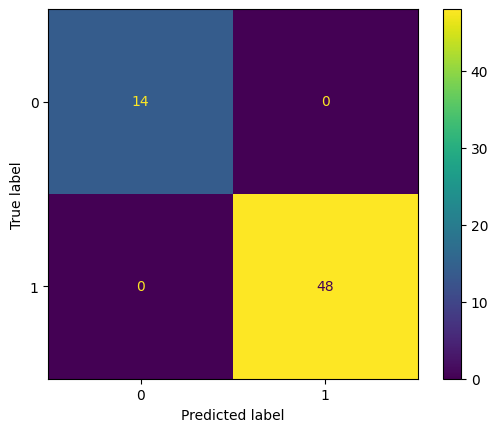

In [ ]:
# Model Performance Evaluation Metric 2
# Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
#Model Evaluation Metric 3 - prediction report
for x in range(len(y_pred)):
  print("Predicted: ", y_pred[x], "Actual: ", y_test[x], "Data: ", x_test[x],)

Predicted:  0 Actual:  0 Data:  (0, 13, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0)
Predicted:  0 Actual:  0 Data:  (0, 14, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0)
Predicted:  0 Actual:  0 Data:  (0, 38, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0)
Predicted:  1 Actual:  1 Data:  (1, 27, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1)
Predicted:  0 Actual:  0 Data:  (1, 26, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0)
Predicted:  1 Actual:  1 Data:  (0, 27, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1)
Predicted:  0 Actual:  0 Data:  (0, 14, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0)
Predicted:  1 Actual:  1 Data:  (1, 13, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1)
Predicted:  1 Actual:  1 Data:  (1, 19, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1)
Predicted:  1 Actual:  1 Data:  (1, 8, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1)
Predicted:  1 Actual:  1 Data:  (1, 25, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1)
Predicted:  1 Actual:  1 Data:  (1, 15, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1)
Predicted:  1 Act